In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

# opp_run -m -u Cmdenv -c RESS-IoT_Sensitivity_Analysis -n "../../src:..:../../../inet4.3/src:../../../inet4.3/examples:../../../inet4.3/tutorials:../../../inet4.3/showcases" -x "inet.emulation;inet.showcases.visualizer.osg;inet.showcases.emulation;inet.clock.common;inet.clock.model;inet.visualizer.osg;inet.examples.voipstream;inet.clock.oscillator;inet.examples.emulation;inet.transportlayer.tcp_lwip;inet.applications.voipstream;inet.clock.base;inet.examples.clock;inet.transportlayer.tcp_nsc" --image-path=../../images:../../../inet4.3/images -l ../../src/flora -l ../../../inet4.3/src/INET --cmdenv-express-mode=true omnetpp.ini

In [39]:
plt.rcParams.update({'font.size': 16})
plt.rc('legend', fontsize=14)
plt.rcParams.update({'font.family': 'Times New Roman'})

In [40]:
def get_throughput_kilobytes_per_hour(df):
    # Throughput kB / hr
    sim_time_hours = float(df.loc[df['name'] == 'simulated time'].value.iloc[0]) / 60 / 60
    kilobytes_per_data_packet = int(df.loc[df['name'] == 'dataPacketLenBits'].value.iloc[0]) / 8 / 1000
    num_data_packets = int(df.loc[df['name'] == 'numDataPacketsReceived'].value.iloc[0])

    return (num_data_packets * kilobytes_per_data_packet) / sim_time_hours

def get_jfi(df):
    # Jain's Fairness Index
    num_nodes = int(df.loc[df['name'] == 'nrOfNodes'].value.iloc[0])
    denominator = num_nodes * df[df['name'].str.startswith('numDataPacketsReceivedByNodeId', na=False)].value.astype(int).pow(2).sum()
    numerator =  df[df['name'].str.startswith('numDataPacketsReceivedByNodeId', na=False)].value.astype(int).sum() ** 2.0
    jfi = numerator / denominator if denominator != 0 else 0
    return jfi

In [41]:
import os

data_dir = "sensitivity_data"
sca_files = [f for f in os.listdir(data_dir) if ".sca" in f and "RESS-IoT" in f]

sim_data = []

for file_name in sca_files:
    df = pd.read_csv(f"{os.path.join(data_dir, file_name)}", dtype=str)
    
    name = file_name.split('_')[0]
    parts = file_name.split('-')[2].split(",")
    params = [param.split("=")[1] for param in parts]
    run_data = [name, get_throughput_kilobytes_per_hour(df), get_jfi(df), *params]
    
    sim_data.append(run_data)

sim_data.sort(key=lambda run_data: (int(run_data[-1]), int(run_data[1]), float(run_data[2])))

header = [
    "Protocol",
    "Throughput [kilobytes / hour]",
    "Jain Fairness Index",
    "wrx",
    "alpha",
    "multiplier",
    "nrOfNodes",
]

sim_data.insert(0, header)    

pd.set_option('display.max_rows', None)
display(pd.DataFrame(sim_data))
df = None

,0,1,2,3,4,5,6
0,Protocol,Throughput [kilobytes / hour],Jain Fairness Index,wrx,alpha,multiplier,nrOfNodes
1,RESS-IoT,31.752,0.956098,9,0.15,0.2,10
2,RESS-IoT,33.453,0.885751,9,0.15,0.1,10
3,RESS-IoT,34.587,0.914251,7,0.1,0.2,10
4,RESS-IoT,34.587,0.932581,7,0.2,0.2,10
5,RESS-IoT,34.587,0.951662,7,0.175,0.1,10
6,RESS-IoT,34.02,0.952381,9,0.125,0.1,10
7,RESS-IoT,35.721,0.9041,9,0.175,0.1,10
8,RESS-IoT,35.154,0.942157,5,0.2,0.1,10
9,RESS-IoT,36.288,0.864135,5,0.125,0.2,10


In [42]:
metrics_ressiot = {}

node_counts = set([row[-1] for row in sim_data[1:]])

for row in sim_data[1:]:
    key = f'{row[0]} ({sim_data[0][3]}: {row[3]}, {sim_data[0][4]}: {row[4]}, {sim_data[0][5]}: {row[5]})'
    if key not in metrics_ressiot:
        metrics_ressiot[key] = {int(node_count): {} for node_count in node_counts}

    metrics_ressiot[key][int(row[-1])] = {
        "Throughput [kilobytes / hour]": [row[1]],
        "Jain Fairness Index": [row[2]],
    }

pprint.pprint(metrics_ressiot)

{'RESS-IoT (wrx: 5, alpha: 0.1, multiplier: 0.1)': {10: {'Jain Fairness Index': [0.8922123893805309],
                                                         'Throughput [kilobytes / hour]': [40.257]},
                                                    100: {'Jain Fairness Index': [0.4001075268817204],
                                                          'Throughput [kilobytes / hour]': [34.586999999999996]},
                                                    1000: {'Jain Fairness Index': [0.07519277108433735],
                                                           'Throughput [kilobytes / hour]': [44.793]},
                                                    2000: {'Jain Fairness Index': [0.0375],
                                                           'Throughput [kilobytes / hour]': [42.52499999999999]}},
 'RESS-IoT (wrx: 5, alpha: 0.1, multiplier: 0.2)': {10: {'Jain Fairness Index': [0.9309090909090909],
                                                         'Throu

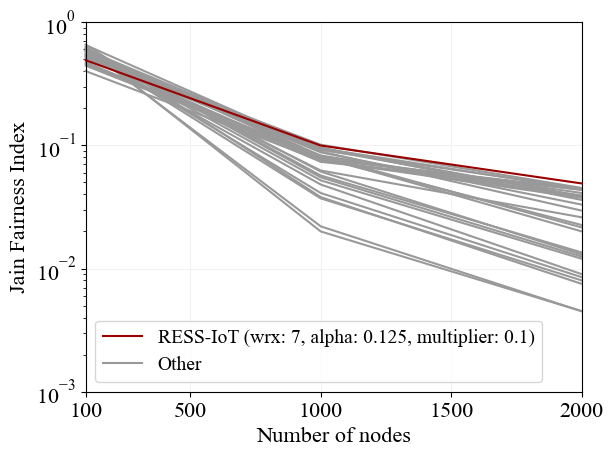

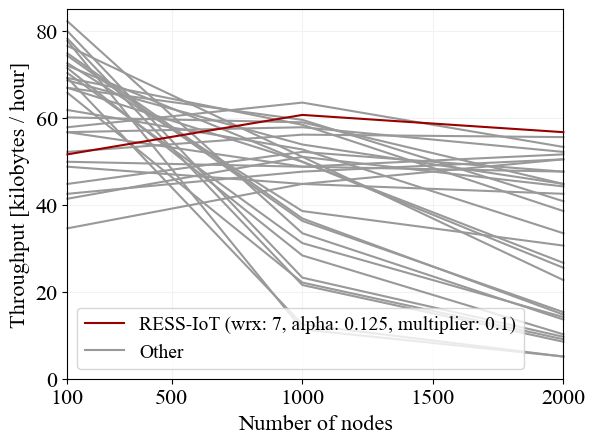

In [43]:
output_dir = "output_graphs"

def plot_runs(metric_names, label, ylims, is_log=False, show_metric_name=False):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for metric in metric_names:
        for index, key in enumerate(metrics_ressiot):
            x = list(metrics_ressiot[key].keys())[1:]  # skip count = 10
            x.sort()
            ys = [metrics_ressiot[key][node_count][metric] for node_count in x]
            y = [np.average(y) for y in ys]

            key_label = key if not show_metric_name else f"{metric} - {key}"
            
            if key_label == "RESS-IoT (wrx: 7, alpha: 0.125, multiplier: 0.1)":
                color = "#990000"
                zorder = 999
            else:
                color = "#999999"
                zorder = 2
                if index == len(metrics_ressiot) - 1:
                    key_label = "Other"
                else:
                    key_label = "_nolegend_"
            plt.plot(x, y, label=key_label, color=color, zorder=zorder, clip_on=False)
    
    plt.ylabel(label)
    plt.xlabel("Number of nodes")
    plt.legend(loc="lower left")
    plt.grid(linestyle='-', color='0.95')
    
    if is_log:
        plt.yscale("log")  
    
    plt.ylim(ylims[0], ylims[1])
    plt.xlim(100, 2000)

    x_ticks = np.append(ax.get_xticks()[1:], 100)
    ax.set_xticks(x_ticks)

    plt.savefig(
        os.path.join(output_dir, f"sensitivity_RESS-IoT_{label.replace(' ', '_').replace('/', '_')}.pdf"),
        format="pdf" 
    )
    plt.show()
    
##### Jain Fairness Index
metric = "Jain Fairness Index"
plot_runs([metric], metric, [0.001, 1], True)

##### Throughput bytes / hour
metric = "Throughput [kilobytes / hour]"
plot_runs([metric], metric, [0, 85])

In [44]:
### DQ Below

In [45]:
import os

data_dir = "sensitivity_data"
sca_files = [f for f in os.listdir(data_dir) if ".sca" in f and "DQ" in f]

sim_data = []

for file_name in sca_files:
    df = pd.read_csv(f"{os.path.join(data_dir, file_name)}", dtype=str)
    
    name = file_name.split('_')[0]
    parts = file_name.split('-')[1].split(",")
    params = [param.split("=")[1] for param in parts]
    run_data = [name, get_throughput_kilobytes_per_hour(df), get_jfi(df), *params]
    
    sim_data.append(run_data)

sim_data.sort(key=lambda run_data: (int(run_data[-1]), int(run_data[1]), float(run_data[2])))

header = [
    "Protocol",
    "Throughput [kilobytes / hour]",
    "Jain Fairness Index",
    "numContentionSlots",
    "nrOfNodes",
]

sim_data.insert(0, header)    

pd.set_option('display.max_rows', None)
display(pd.DataFrame(sim_data))
df = None

,0,1,2,3,4
0,Protocol,Throughput [kilobytes / hour],Jain Fairness Index,numContentionSlots,nrOfNodes
1,DQ,39.69,0.890909,5,10
2,DQ,41.958,0.866456,3,10
3,DQ,83.916,0.693165,5,100
4,DQ,88.452,0.617665,3,100
5,DQ,57.834,0.063439,3,1000
6,DQ,71.442,0.095639,5,1000
7,DQ,37.422,0.029432,3,2000
8,DQ,43.092,0.032089,5,2000


In [46]:
metrics_dq = {}

node_counts = set([row[-1] for row in sim_data[1:]])

for row in sim_data[1:]:
    key = f'{row[0]} ({sim_data[0][3]}: {row[3]})'
    if key not in metrics_dq:
        metrics_dq[key] = {int(node_count): {} for node_count in node_counts}

    metrics_dq[key][int(row[-1])] = {
        "Throughput [kilobytes / hour]": [row[1]],
        "Jain Fairness Index": [row[2]],
    }

pprint.pprint(metrics_dq)

{'DQ (numContentionSlots: 3)': {10: {'Jain Fairness Index': [0.8664556962025316],
                                     'Throughput [kilobytes / hour]': [41.958]},
                                100: {'Jain Fairness Index': [0.6176649746192894],
                                      'Throughput [kilobytes / hour]': [88.45199999999998]},
                                1000: {'Jain Fairness Index': [0.0634390243902439],
                                       'Throughput [kilobytes / hour]': [57.833999999999996]},
                                2000: {'Jain Fairness Index': [0.02943243243243243],
                                       'Throughput [kilobytes / hour]': [37.422000000000004]}},
 'DQ (numContentionSlots: 5)': {10: {'Jain Fairness Index': [0.8909090909090909],
                                     'Throughput [kilobytes / hour]': [39.69]},
                                100: {'Jain Fairness Index': [0.6931645569620253],
                                      'Throughput [kilob

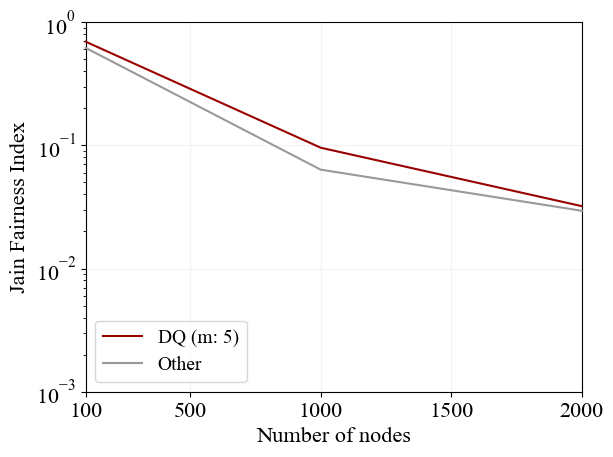

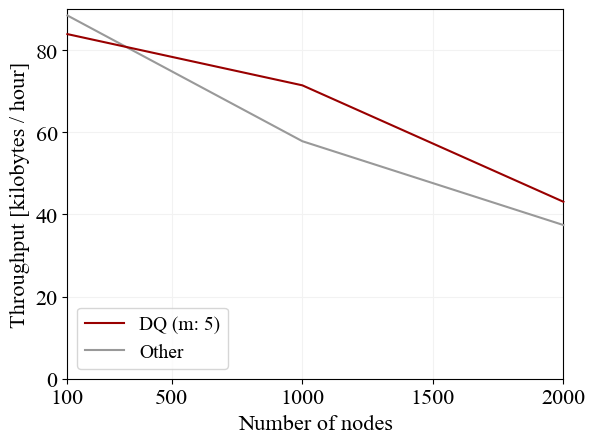

In [47]:
output_dir = "output_graphs"

def plot_runs(metric_names, label, ylims, is_log=False, show_metric_name=False):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for metric in metric_names:
        for key in metrics_dq:
            x = list(metrics_dq[key].keys())[1:]  # skip count = 10
            x.sort()
            ys = [metrics_dq[key][node_count][metric] for node_count in x]
            y = [np.average(y) for y in ys]

            key_label = key if not show_metric_name else f"{metric} - {key}"
            
            if key_label == "DQ (numContentionSlots: 5)":
                color = "#990000"
                zorder = 999
                key_label = "DQ (m: 5)"
            else:
                color = "#999999"
                zorder = 10
                key_label = "Other"
            plt.plot(x, y, label=key_label, color=color, zorder=zorder, clip_on=False)
    
    plt.ylabel(label)
    plt.xlabel("Number of nodes")
    plt.legend(loc="lower left")
    plt.grid(linestyle='-', color='0.95')
    
    if is_log:
        plt.yscale("log")  
    
    plt.ylim(ylims[0], ylims[1])
    plt.xlim(100, 2000)

    x_ticks = np.append(ax.get_xticks()[1:], 100)
    ax.set_xticks(x_ticks)

    plt.savefig(
        os.path.join(output_dir, f"sensitivity_DQ_{label.replace(' ', '_').replace('/', '_')}.pdf"),
        format="pdf"
    )
    plt.show()
    
##### Jain Fairness Index
metric = "Jain Fairness Index"
plot_runs([metric], metric, [0.001, 1], True)

##### Throughput bytes / hour
metric = "Throughput [kilobytes / hour]"
plot_runs([metric], metric, [0, 90])

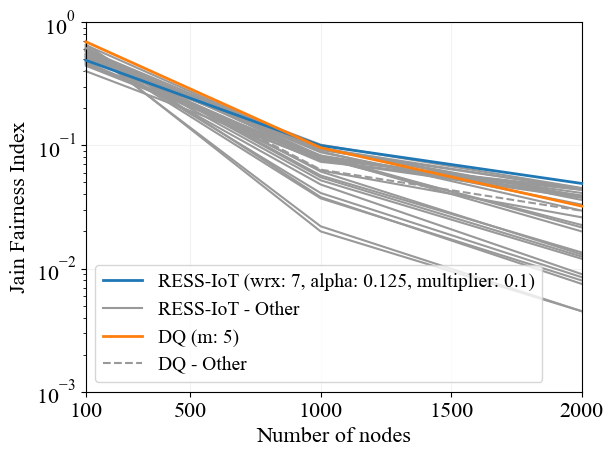

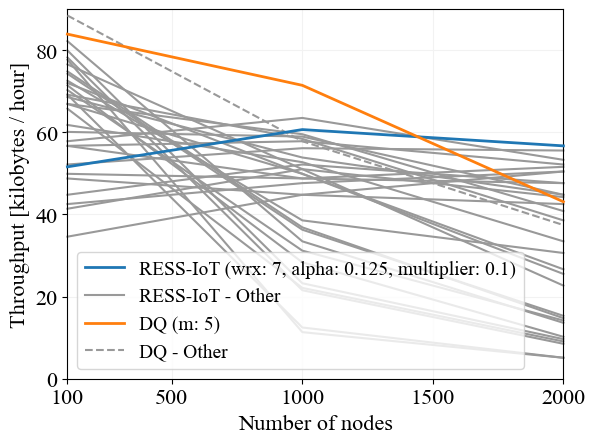

In [60]:
output_dir = "output_graphs"

metrics_combined = {**metrics_ressiot, **metrics_dq}

def plot_runs(metric_names, label, ylims, is_log=False, show_metric_name=False):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for metric in metric_names:
        for index, key in enumerate(metrics_combined):
            x = list(metrics_combined[key].keys())[1:]  # skip count = 10
            x.sort()
            ys = [metrics_combined[key][node_count][metric] for node_count in x]
            y = [np.average(y) for y in ys]

            key_label = key if not show_metric_name else f"{metric} - {key}"

            if key_label == "RESS-IoT (wrx: 7, alpha: 0.125, multiplier: 0.1)":
                # color = "#990000"
                zorder = 999
                plt.plot(x, y, label=key_label, zorder=zorder, clip_on=False, linewidth=2)
            elif key_label == "DQ (numContentionSlots: 5)":
                # color = "#990000"
                zorder = 999
                key_label = "DQ (m: 5)"
                plt.plot(x, y, label=key_label, zorder=zorder, clip_on=False, linewidth=2)
            else:
                if "DQ" in key_label:
                    color = "#999999"
                    zorder = 3
                    key_label = "DQ - Other"
                    plt.plot(x, y, linestyle='dashed', label=key_label, color=color, zorder=zorder, clip_on=False) 
                else:
                    color = "#999999"
                    zorder = 2
                    if index == len(metrics_combined) - 4:
                        key_label = "RESS-IoT - Other"
                    else:
                        key_label = "_nolegend_"
                    plt.plot(x, y, label=key_label, color=color, zorder=zorder, clip_on=False)

    plt.ylabel(label)
    plt.xlabel("Number of nodes")
    plt.legend(loc="lower left")
    plt.grid(linestyle='-', color='0.95')

    if is_log:
        plt.yscale("log")

    plt.ylim(ylims[0], ylims[1])
    plt.xlim(100, 2000)

    x_ticks = np.append(ax.get_xticks()[1:], 100)
    ax.set_xticks(x_ticks)

    plt.savefig(
        os.path.join(output_dir, f"sensitivity_combined_{label.replace(' ', '_').replace('/', '_')}.pdf"),
        format="pdf"
    )
    plt.show()

##### Jain Fairness Index
metric = "Jain Fairness Index"
plot_runs([metric], metric, [0.001, 1], True)

##### Throughput bytes / hour
metric = "Throughput [kilobytes / hour]"
plot_runs([metric], metric, [0, 90])